First let's import the modules we'll use in this task

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Now we'll load the iris dataset

In [2]:
iris = datasets.load_iris()

Split the dataset into inputs (X) and Ouputs (y)

In [3]:
X = iris.data[:, :-1]
y = iris.target

After getting the data in the correct shapes, we run KMeans clustering algorithm for several values of K and we'll store the within clusters sum of squares in a list named "wcss" (for using the elbow method later)

In [4]:
wcss = []
for i in range(1, 11):
    x = KMeans(n_clusters = i).fit(X)
    wcss.append(x.inertia_)

Now we plot the results on a line graph which will allow us to observe the elbow

Text(0, 0.5, 'WCSS')

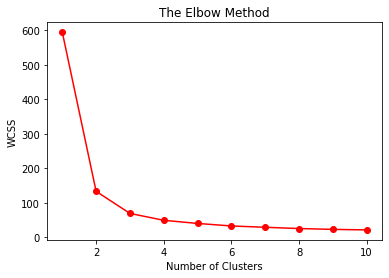

In [5]:
plt.plot(range(1, 11), wcss, 'r-o')
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

We can see that after using 3 clusters, the "within clusters sum of squares" doesn't decrease significantly with each iteration (increasing number of clusters), so we can say that the optimal number of clusters is 3.

And that we know what is the number of clusters in our data, we run KMeans clustering again for K = 3, to assign each data point to the nearest centroid

In [6]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

After running KMeans Clustering Algorithm for the value K = 3, we can visulize the process by plotting the clusters (points and its centroids)

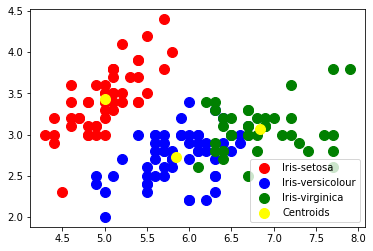

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()